In [2]:
import numpy as np
import pandas as pd

In [3]:
X = 2 * np.random.randn(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [13]:
A = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

In [14]:
theta_best

array([[3.92587317],
       [2.95471843]])

In [11]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [15]:
y_pred = X_new_b.dot(theta_best)

In [16]:
y_pred

array([[3.92587317],
       [9.83531002]])

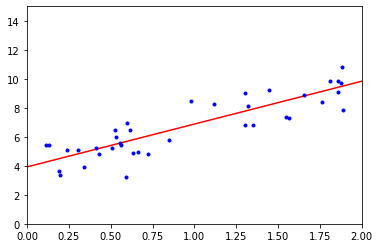

In [25]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.92587317]), array([[2.95471843]]))

## Gradient Descent

In [29]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    grad = (2/m) * A.T.dot(A.dot(theta) - y)
    theta = theta - eta * grad

theta

array([[3.92587317],
       [2.95471843]])

## Polynomial Regression

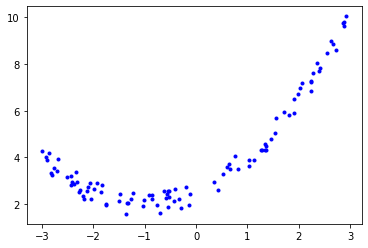

In [52]:
m = 100
#create vector of x values
X = 6 * np.random.rand(m,1) - 3
#feed into a quadratic and add noise
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m,1)
poly_plot = plt.plot(X, y, 'b.')

plt.show()

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)
print(X[0])
X_poly[0]

[-1.53870421]


array([-1.53870421,  2.36761064])

In [39]:
#X_poly contains X and its square. Use linear regression to find its parameters
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.53427331] [[0.99844048 0.49888055]]


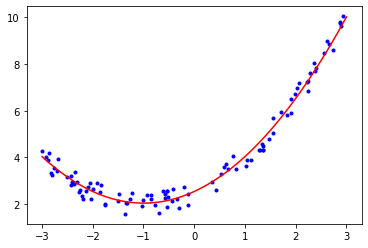

In [57]:
X_demo = np.linspace(-3,3,100).reshape(100,1)
X_demo_poly = poly_feat.transform(X_demo)
y_demo = lin_reg.predict(X_demo_poly)

plt.plot(X, y, 'b.')
plt.plot(X_demo, y_demo, 'r-')

## Write a Learning Curve Plotting Function

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    #split the data in training and testing data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        #train on m instances
        model.fit(X_train[:m], y_train[:m])
        #predict y_train and y_val
        y_train_pred = model.predict(X_train[:m])
        y_pred = model.predict(X_val)
        #get error training 
        train_errors.append(mean_squared_error(y_train_pred, y_train[:m]))
        #get error on validation
        val_errors.append(mean_squared_error(y_val, y_pred))
    plt.plot(np.sqrt(train_errors), "r+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [63]:
range(len(X))

range(0, 100)

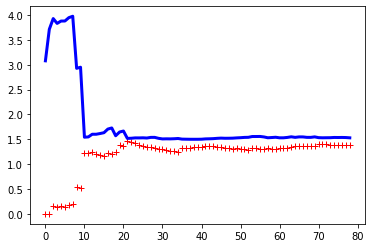

In [65]:
plot_learning_curves(lin_reg, X, y)

In [3]:
x_axis = np.linspace(0,3,1000)

In [6]:
print(x_axis.shape)

(1000,)


In [9]:
x_axis.reshape(-1,1)[:4]

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901]])

In [10]:
x_axis[:4]

array([0.        , 0.003003  , 0.00600601, 0.00900901])